# Pandas Pre-processing

We now have a deeper look at the operations we can perform as we ingest data using the Pandas library in Python. 

Pandas is a powerful tool for data manipulation and analysis, and it provides a variety of functions to clean, transform, and prepare data for analysis.

These start at the very beginning, when we read the data into a DataFrame, and continue through various stages of preprocessing.


We are going to explore these concepts through a walked-through approach. We will use historical weather data that is freely available online and manipulate it to ease its interpretation.


In [1]:
# first, load the important moodules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Loading the Data

We'll start by loading weather data from Cardiff Bute Park. This dataset contains monthly weather observations spanning several decades.

**Note.** Panda's function `read_csv()` can read both from a local file and from a public URl, as in this case.

In [2]:
# Load the Cardiff weather dataset from a publich github repository
url = "https://raw.githubusercontent.com/alanjones2/uk-historical-weather/refs/heads/main/data/Cardiff_Bute_Park.csv"
df_cardiff = pd.read_csv(url) 

# Display the first few rows
print("First 5 rows of the dataset:")
df_cardiff.head()

First 5 rows of the dataset:


,Unnamed: 0,Year,Month,Tmax,Tmin,AF,Rain,Sun,status,Date,Tmean
0,7,1977,9,18.3,8.1,0.0,48.6,117.9,NaN,1977-09-01,13.20
1,8,1977,10,15.4,9.0,0.0,76.0,80.4,NaN,1977-10-01,12.20
2,9,1977,11,10.3,4.7,4.0,147.9,76.4,NaN,1977-11-01,7.50
3,10,1977,12,9.6,4.6,2.0,88.0,25.6,NaN,1977-12-01,7.10
4,11,1978,1,7.5,2.0,6.0,134.1,64.7,NaN,1978-01-01,4.75


## Step 2: Initial Data Exploration

Before we start cleaning, let's understand what we're working with.

To do so, we first check the amount of data that we have by inspecting the **shape** of the data frame and the names of the various columns.

In [3]:
# Check the shape of the dataset
print(f"Dataset dimensions: {df_cardiff.shape[0]} rows × {df_cardiff.shape[1]} columns")
print(f"\nColumn names:\n{df_cardiff.columns.tolist()}")

Dataset dimensions: 578 rows × 11 columns

Column names:
['Unnamed: 0', 'Year', 'Month', 'Tmax', 'Tmin', 'AF', 'Rain', 'Sun', 'status', 'Date', 'Tmean']


It is clear that we read useful data but also less useful one:

**Useful data**
- We have weather measurements (`Tmax`, `Tmin`, `Tmean` for temperature; `Rain` for precipitation; `Sun` for sunshine hours; `AF` for air frost days)

**Less useful data**
- The `Unnamed: 0` column appears to be a redundant index
- The `status` column is mostly empty and indicates data status
- There's redundancy between `Year`/`Month` and `Date` columns

> **Note**. We can check the details of the various datatypes and amount of valid data using the dataframe method `info()`.

In [4]:
# Get detailed information about the dataset
print("Dataset Info:")
df_cardiff.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  578 non-null    int64  
 1   Year        578 non-null    int64  
 2   Month       578 non-null    int64  
 3   Tmax        533 non-null    float64
 4   Tmin        544 non-null    float64
 5   AF          544 non-null    float64
 6   Rain        555 non-null    float64
 7   Sun         214 non-null    float64
 8   status      10 non-null     object 
 9   Date        578 non-null    object 
 10  Tmean       529 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 49.8+ KB


It is clear that some columns are full of data and some almost empty. We will need to clean this up.

We can get quick statistics of the data distribution by calculating some main statistics. 

The `.describe()` method computes summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for all numerical columns in the dataframe.

In [5]:
# Check basic statistics
print("Basic Statistics:")
df_cardiff.describe()

Basic Statistics:


,Unnamed: 0,Year,Month,Tmax,Tmin,AF,Rain,Sun,Tmean
count,578.000000,578.000000,578.000000,533.000000,544.000000,544.000000,555.000000,214.000000,529.000000
mean,295.500000,2001.249135,6.510381,14.770356,7.183640,2.875000,98.627207,123.613551,10.939319
std,166.998503,13.920057,3.453689,5.061218,4.088772,4.361961,56.310240,64.583361,4.537896
min,7.000000,1977.000000,1.000000,3.900000,-3.400000,0.000000,3.500000,22.000000,0.250000
25%,151.250000,1989.000000,4.000000,10.300000,3.700000,0.000000,56.050000,64.750000,7.100000
50%,295.500000,2001.000000,7.000000,14.400000,6.800000,0.000000,89.200000,117.900000,10.600000
75%,439.750000,2013.000000,9.750000,19.200000,10.900000,5.000000,138.000000,168.875000,15.050000
max,584.000000,2025.000000,12.000000,26.000000,15.500000,27.000000,282.000000,305.400000,20.500000


> **Note.** The output of the `describe()` method is itself a dataframe. Try and explore it!

In [6]:
df_describe = df_cardiff.describe()
df_describe.loc['mean', 'Month']

np.float64(6.510380622837371)

### Understanding the Columns

Let's understand what each column represents:

- **Unnamed: 0**: Index column (we'll handle this)
- **Year**: Year of observation
- **Month**: Month number (1-12)
- **Tmax**: Maximum temperature (°C)
- **Tmin**: Minimum temperature (°C)
- **AF**: Air Frost days (days with temperature below 0°C)
- **Rain**: Rainfall (mm)
- **Sun**: Sunshine hours
- **status**: Data status indicator
- **Date**: Date string
- **Tmean**: Mean temperature (°C)

## Step 3: Data Type Conversions

Pandas has inferred the data types, but let's check if they're appropriate for our analysis.

In [7]:
# Check current data types
print("Current data types:")
print(df_cardiff.dtypes)
print("\n" + "="*50)

# Check the Date column more closely
print("\nDate column sample values:")
print(df_cardiff['Date'].head(10))
print(f"\nDate column type: {df_cardiff['Date'].dtype}")

Current data types:
Unnamed: 0      int64
Year            int64
Month           int64
Tmax          float64
Tmin          float64
AF            float64
Rain          float64
Sun           float64
status         object
Date           object
Tmean         float64
dtype: object


Date column sample values:
0    1977-09-01
1    1977-10-01
2    1977-11-01
3    1977-12-01
4    1978-01-01
5    1978-02-01
6    1978-03-01
7    1978-04-01
8    1978-05-01
9    1978-06-01
Name: Date, dtype: object

Date column type: object


### Converting Date Column to Datetime

The `Date` column is currently stored as text (`object`). This is not ideal, as it does not leverage the advanced capabilities of pandas when dealing with time data. 

For example, pandas datetime variables allow to easily filter data by date ranges, resample to different time frequencies (e.g., yearly averages), or create time-based visualizations with proper axis labels.

Indeed, we can  convert it to a proper **datetime type** which will preserve the temporal order of the data points.

To perform the conversion, we use the **pandas function ** `pd.to_datetime`. Notice that this is not a dataframe method.

In [8]:
# Convert Date column to datetime
df_cardiff['Date'] = pd.to_datetime(df_cardiff['Date'])

print("After conversion:")
print(f"Date column type: {df_cardiff['Date'].dtype}")
print(f"\nDate range: {df_cardiff['Date'].min()} to {df_cardiff['Date'].max()}")
print(f"Time span: {(df_cardiff['Date'].max() - df_cardiff['Date'].min()).days / 365.25:.1f} years")

After conversion:
Date column type: datetime64[ns]

Date range: 1977-09-01 00:00:00 to 2025-10-01 00:00:00
Time span: 48.1 years


Now we can perform boolean tests using dates!

In [9]:
# selecting all the rows of teh dataframe past 1980-05-01
df_cardiff[df_cardiff['Date']>'1980-05-01']

,Unnamed: 0,Year,Month,Tmax,Tmin,AF,Rain,Sun,status,Date,Tmean
33,40,1980,6,18.3,10.3,0.0,125.8,175.6,NaN,1980-06-01,14.30
34,41,1980,7,19.0,11.2,0.0,67.2,167.4,NaN,1980-07-01,15.10
35,42,1980,8,20.0,12.6,0.0,85.8,158.2,NaN,1980-08-01,16.30
36,43,1980,9,18.5,11.8,0.0,99.2,147.9,NaN,1980-09-01,15.15
37,44,1980,10,13.3,5.8,0.0,147.5,108.1,NaN,1980-10-01,9.55
...,...,...,...,...,...,...,...,...,...,...,...
573,580,2025,6,22.0,13.2,0.0,NaN,NaN,Provisional,2025-06-01,17.60
574,581,2025,7,24.1,14.4,0.0,NaN,NaN,Provisional,2025-07-01,19.25
575,582,2025,8,23.4,13.2,0.0,29.8,NaN,Provisional,2025-08-01,18.30
576,583,2025,9,19.0,10.2,0.0,194.2,NaN,Provisional,2025-09-01,14.60


## Step 4: Handling the Index

Notice the `Unnamed: 0` column? This is an artifact from the CSV file and bears little to no information.

The index column is important as it simplifies slicing and plotting. Since we are dealing with a time series, a natural choice for the index column is to use the date itself.

We can do this by setting the index of the column with `set_index`

In [10]:
# Set Date as the index
df_cardiff = df_cardiff.set_index('Date')

# Drop the unnecessary Unnamed: 0 column
df_cardiff = df_cardiff.drop('Unnamed: 0', axis=1)


In [11]:
print("After setting index:")
df_cardiff

After setting index:


,Year,Month,Tmax,Tmin,AF,Rain,Sun,status,Tmean
Date,,,,,,,,,
1977-09-01,1977,9,18.3,8.1,0.0,48.6,117.9,NaN,13.20
1977-10-01,1977,10,15.4,9.0,0.0,76.0,80.4,NaN,12.20
1977-11-01,1977,11,10.3,4.7,4.0,147.9,76.4,NaN,7.50
1977-12-01,1977,12,9.6,4.6,2.0,88.0,25.6,NaN,7.10
1978-01-01,1978,1,7.5,2.0,6.0,134.1,64.7,NaN,4.75
...,...,...,...,...,...,...,...,...,...
2025-06-01,2025,6,22.0,13.2,0.0,NaN,NaN,Provisional,17.60
2025-07-01,2025,7,24.1,14.4,0.0,NaN,NaN,Provisional,19.25
2025-08-01,2025,8,23.4,13.2,0.0,29.8,NaN,Provisional,18.30


## Step 5: Detecting Missing Values

Real-world data often has missing values. Let's investigate.

Missing data in pandas is encoded as `NaN` (Not a Number). We can check for missing values using the `isnull()` method combined with `sum()` to get a count of missing values per column.

In [12]:
# Check for missing values
print("Missing values per column:")
missing_counts = df_cardiff.isnull().sum()
print(missing_counts)


Missing values per column:
Year        0
Month       0
Tmax       45
Tmin       34
AF         34
Rain       23
Sun       364
status    568
Tmean      49
dtype: int64


We need a strategy to handle these missing values. 
It is useful to see what the rows with missing data look like. We can do this by filtering the dataframe using the `isnull()` method.

For example, we can check what the rows with a missing `Sun` value look like.

In [13]:
# Which rows have missing Sun data?
rows_missing_sun = df_cardiff[df_cardiff['Sun'].isnull()]
print(f"Rows with missing Sun data: {len(rows_missing_sun)}")
print("\nFirst few rows with missing Sun data:")
print(rows_missing_sun.head(10))

Rows with missing Sun data: 364

First few rows with missing Sun data:
            Year  Month  Tmax  Tmin   AF  Rain  Sun status  Tmean
Date                                                             
1985-12-01  1985     12   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-01-01  1986      1   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-02-01  1986      2   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-03-01  1986      3   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-04-01  1986      4   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-05-01  1986      5   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-06-01  1986      6   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-07-01  1986      7   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1986-08-01  1986      8   NaN   NaN  NaN   NaN  NaN    NaN    NaN
1996-04-01  1996      4  13.8   5.1  1.0  70.2  NaN    NaN   9.45


It looks like entire rows are missing, which suggests that the data for those months was not recorded. We will need to carefully handle these missing values.

## Step 6: Handling Missing Values

We have three main strategies for missing data:
1. **Drop** rows/columns with missing values
2. **Fill** with specific values (mean, median, forward fill, etc.)
3. **Interpolate** based on surrounding values

Let's handle each column appropriately.

### Handling the Status Column

As we have seen earlier, the `status` column is mostly empty and doesn't seem critical for our analysis. Let's drop it. uding the `drop()` method.

In [14]:
# Drop the status column
df_cardiff = df_cardiff.drop('status', axis=1)
print("After dropping 'status' column:")
print(df_cardiff.columns.tolist())

After dropping 'status' column:
['Year', 'Month', 'Tmax', 'Tmin', 'AF', 'Rain', 'Sun', 'Tmean']


Here the `axis=1` argument specifies that we want to drop a column (not a row), avoiding potential ambiguities. Now the dataframe looks as follows:

In [15]:
df_cardiff

,Year,Month,Tmax,Tmin,AF,Rain,Sun,Tmean
Date,,,,,,,,
1977-09-01,1977,9,18.3,8.1,0.0,48.6,117.9,13.20
1977-10-01,1977,10,15.4,9.0,0.0,76.0,80.4,12.20
1977-11-01,1977,11,10.3,4.7,4.0,147.9,76.4,7.50
1977-12-01,1977,12,9.6,4.6,2.0,88.0,25.6,7.10
1978-01-01,1978,1,7.5,2.0,6.0,134.1,64.7,4.75
...,...,...,...,...,...,...,...,...
2025-06-01,2025,6,22.0,13.2,0.0,NaN,NaN,17.60
2025-07-01,2025,7,24.1,14.4,0.0,NaN,NaN,19.25
2025-08-01,2025,8,23.4,13.2,0.0,29.8,NaN,18.30


### Handling Missing Sun Data

For the `Sun` (sunshine hours) column, interpolation could make sense as sunshine hours vary smoothly over time.


Interpolation means to estimate missing values based on existing data points. In simple temrs, we can think of it as "filling in the gaps" by looking at the values before and after the missing data.




For example, imagine you have measurements of sunshine hours for most months but some months are missing. By interpolating, we can estimate the sunshine hours for those missing months based on the values from the surrounding months.



![Interpolation example](./fig/linear_interpolation_example.png)

Visually, in the case of linear interpolation, this looks like connecting the dots with straight lines and reading the value where the missing point should be:




We have various interpolation strategies that are available out of the box that go beyond simple linear interpolation. These include polynomial interpolation, spline interpolation, and others (which we will not explore in this workshop but you are invited to have a look yourself). Clearly, more complex methods require more computational resources, may use more parameters, and may be more prone to produce unexpected results. The may, however, be more accurate in some situations (if duly motivated).

We can specify the method using the `method` argument in the `interpolate()` method.

In [16]:
# Before interpolation
print(f"Missing Sun values before: {df_cardiff['Sun'].isnull().sum()}")

# Interpolate missing values
df_cardiff['Sun'] = df_cardiff['Sun'].interpolate(method='linear')

# After interpolation
print(f"Missing Sun values after: {df_cardiff['Sun'].isnull().sum()}")

# Show a few interpolated values
print("\nSample of data (some values were interpolated):")
print(df_cardiff.loc['2022-01-01':'2022-06-01', ['Year', 'Month', 'Sun']])

Missing Sun values before: 364
Missing Sun values after: 0

Sample of data (some values were interpolated):
            Year  Month   Sun
Date                         
2022-01-01  2022      1  63.6
2022-02-01  2022      2  63.6
2022-03-01  2022      3  63.6
2022-04-01  2022      4  63.6
2022-05-01  2022      5  63.6
2022-06-01  2022      6  63.6


### Final Check for Missing Values

We operated our interpolation only on the `Sun` column. Let's check if there are any remaining missing values in the dataframe.

In [17]:
# Verify no missing values remain
print("Final missing value check:")
print(df_cardiff.isnull().sum())
print(f"\nTotal missing values: {df_cardiff.isnull().sum().sum()}")

Final missing value check:
Year      0
Month     0
Tmax     45
Tmin     34
AF       34
Rain     23
Sun       0
Tmean    49
dtype: int64

Total missing values: 185


This is visible in plots as gaps or breaks in the lines. We can use `matpltolib` to visualize the data and check for continuity. Remember that the `.index` attribute is now our datetime index, i.e. our natural independent variable.

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Tmean')]

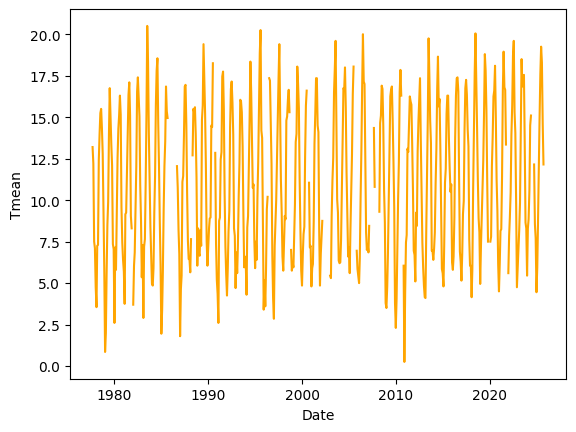

In [18]:
plt.plot(df_cardiff.index, df_cardiff['Tmean'], label='Daily Sunlight Hours', color='orange')
plt.gca().set(xlabel='Date', ylabel='Tmean') # set propeties of the current axis using the `getc current axis` method, i.e. gca()

If we want to apply a method to all columns (including `Tmean`), we can simply call the `interpolate()` method without specifying a column.

In [19]:
# Interpolate all missing values using quadratic method, just as an example 
df_cardiff  = df_cardiff.interpolate(method='quadratic')
df_cardiff.isnull().sum()


Year     0
Month    0
Tmax     0
Tmin     0
AF       0
Rain     0
Sun      0
Tmean    0
dtype: int64

Replot the data to confirm that there are no gaps (but also shows the limitations of local interpolation).

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Tmean')]

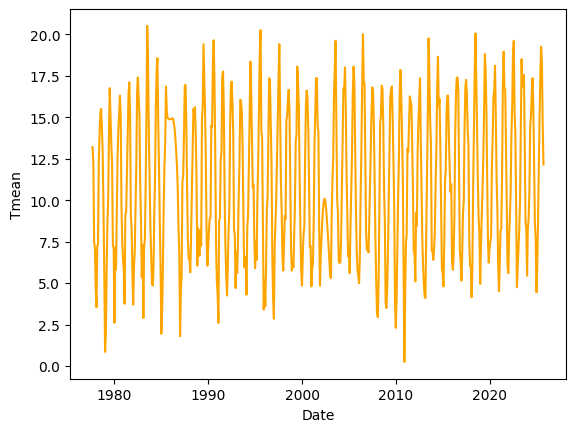

In [20]:
plt.plot(df_cardiff.index, df_cardiff['Tmean'], label='Daily Sunlight Hours', color='orange')
plt.gca().set(xlabel='Date', ylabel='Tmean') # set propeties of the current axis using the `getc current axis` method, i.e. gca()

## Step 7: Extracting Date Components


Pandas is very powerful when dealing with datetime data. It is capable of transforming datetime data into various useful components.

For example, our date time is in `YYYY-MM-DD` format. This means that we have the year, month, and day all in one column.

We can use this to extract useful individual components year, month name, season, etc.

Any daytime columns has many attributibes, such as `.year`, `.month`, `.day`, `.dayofweek`, etc.

In [21]:
df_cardiff.index.year

Index([1977, 1977, 1977, 1977, 1978, 1978, 1978, 1978, 1978, 1978,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='Date', length=578)

We can operate on them to perform insightful analyses. 


In [22]:
df_cardiff.index.year.unique() # this gives us all the unique years in the index


Index([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025],
      dtype='int32', name='Date')

We can for example extract the month name from the datetime index and create a new column `Month_Name` to store it. We can do the same for the quarter of the year.

In [23]:
# Extract additional date components
df_cardiff['Month_Name'] = df_cardiff.index.month_name()
df_cardiff['Quarter'] = df_cardiff.index.quarter

print("Data with extracted date components:")
print(df_cardiff[['Year', 'Month', 'Month_Name',  'Quarter', 'Tmax', 'Tmin']].head(10))

Data with extracted date components:
            Year  Month Month_Name  Quarter  Tmax  Tmin
Date                                                   
1977-09-01  1977      9  September        3  18.3   8.1
1977-10-01  1977     10    October        4  15.4   9.0
1977-11-01  1977     11   November        4  10.3   4.7
1977-12-01  1977     12   December        4   9.6   4.6
1978-01-01  1978      1    January        1   7.5   2.0
1978-02-01  1978      2   February        1   6.2   0.9
1978-03-01  1978      3      March        1  10.6   3.9
1978-04-01  1978      4      April        2  10.9   3.7
1978-05-01  1978      5        May        2  17.3   7.5
1978-06-01  1978      6       June        2  18.5   9.5


### Creating a Season Column

Using the month we can even **create a new categorical column**, labelling the data by season.

This leverages the power of data to apply any arbitrary function to the data frame using the `apply()` method.

In this case we crate a very simple custom function that maps month numbers to season names.

We then **pass** the name of the custom function to the `apply()` method of a specific column (in this case the `Month` column).


> **Note.** This is an example of Python treating functions as **first-class objects**, i.e., we can pass them as arguments to other functions/methods. It is a simple instance of a broader programming paradigm called **functional programming**.

In [24]:
# Define a function to map months to seasons (Northern Hemisphere)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Autumn'

# Apply the function
df_cardiff['Season'] = df_cardiff['Month'].apply(get_season)

print("Data with seasons:")
print(df_cardiff[['Month', 'Month_Name', 'Season', 'Tmax', 'Rain']].head(12))

Data with seasons:
            Month Month_Name  Season  Tmax   Rain
Date                                             
1977-09-01      9  September  Autumn  18.3   48.6
1977-10-01     10    October  Autumn  15.4   76.0
1977-11-01     11   November  Autumn  10.3  147.9
1977-12-01     12   December  Winter   9.6   88.0
1978-01-01      1    January  Winter   7.5  134.1
1978-02-01      2   February  Winter   6.2  134.1
1978-03-01      3      March  Spring  10.6  121.3
1978-04-01      4      April  Spring  10.9   63.6
1978-05-01      5        May  Spring  17.3   30.6
1978-06-01      6       June  Summer  18.5   29.6
1978-07-01      7       July  Summer  18.7  110.1
1978-08-01      8     August  Summer  19.6   40.5


## Step 8: Creating More Derived Features

We can continue operating on teh data to create more derived features using simple arithmetic operations.

In [25]:
# Temperature range (difference between max and min)
df_cardiff['Temp_Range'] = df_cardiff['Tmax'] - df_cardiff['Tmin']
# Is it a rainy month? (>100mm rainfall)
df_cardiff['Rainy_Month'] = df_cardiff['Rain'] > 100

# Is it a sunny month? (>150 hours sunshine)
df_cardiff['Sunny_Month'] = df_cardiff['Sun'] > 150

print("Monthly classifications:")
print(df_cardiff[['Month_Name', 'Rain', 'Rainy_Month', 'Sun', 'Sunny_Month']].head(20))
print(f"\nRainy months: {df_cardiff['Rainy_Month'].sum()} out of {len(df_cardiff)} ({df_cardiff['Rainy_Month'].sum()/len(df_cardiff)*100:.1f}%)")
print(f"Sunny months: {df_cardiff['Sunny_Month'].sum()} out of {len(df_cardiff)} ({df_cardiff['Sunny_Month'].sum()/len(df_cardiff)*100:.1f}%)")

Monthly classifications:
           Month_Name   Rain  Rainy_Month    Sun  Sunny_Month
Date                                                         
1977-09-01  September   48.6        False  117.9        False
1977-10-01    October   76.0        False   80.4        False
1977-11-01   November  147.9         True   76.4        False
1977-12-01   December   88.0        False   25.6        False
1978-01-01    January  134.1         True   64.7        False
1978-02-01   February  134.1         True   56.9        False
1978-03-01      March  121.3         True  122.4        False
1978-04-01      April   63.6        False  118.6        False
1978-05-01        May   30.6        False  188.1         True
1978-06-01       June   29.6        False  177.3         True
1978-07-01       July  110.1         True  115.8        False
1978-08-01     August   40.5        False  164.9         True
1978-09-01  September   34.1        False  182.2         True
1978-10-01    October   12.0        False   8

These additional features allow us to aggregate the data and perform an initial analysis.

A useful tool for this is the `groupby()` method, which allows us to group the data by specific columns and compute aggregate statistics for each group.

For example, we may want to see which month is more often classified as rainy on average.

We can group the data by month and compute the mean rainfall for each month.

To do this we use the following syntax:

<code>dataframe_name.groupby('<span style="background-color: #ffeb3b; padding: 2px 4px;">grouping_column_name</span>')['<span style="background-color: #8bc34a; padding: 2px 4px;">column_to_aggregate</span>'].<span style="background-color: #ff9800; padding: 2px 4px;">aggregation_function()</span></code>


In [34]:
# Group by month and calculate the percentage of rainy months for each month
rainy_by_month = df_cardiff.groupby('Month_Name')['Rainy_Month'].mean() * 100

print("Percentage of rainy months (>100mm) by month:")
rainy_by_month.round(1) #rounding to firth digit


Percentage of rainy months (>100mm) by month:


Month_Name
April        14.6
August       35.4
December     72.9
February     37.5
January      60.4
July         22.9
June         18.8
March        41.7
May          18.8
November     60.4
October      65.3
September    38.8
Name: Rainy_Month, dtype: float64

## Step 9: Exporting Cleaned Data

Finally, let's export our cleaned and enriched dataset for future use.

Pandas can export in many different formats. One of the most common is a **pure text** formal called CSV (comma-separated values).

We can use the `to_csv()` method of the dataframe to export the data to a CSV file.

In [37]:
# Create a clean version with selected columns

df_export = df_cardiff[['Year', 'Month', 'Tmax', 'Tmin', 'Tmean', 'Rain', 'Sun', 'Temp_Range', 'Rainy_Month', 'Sunny_Month']]

print("Data ready for export:")
print(df_export.head(10))
print(f"\nShape: {df_export.shape}")
print(f"Date range: {df_export.index.min()} to {df_export.index.max()}")

Data ready for export:
            Year  Month  Tmax  Tmin  Tmean   Rain    Sun  Temp_Range  \
Date                                                                   
1977-09-01  1977      9  18.3   8.1  13.20   48.6  117.9        10.2   
1977-10-01  1977     10  15.4   9.0  12.20   76.0   80.4         6.4   
1977-11-01  1977     11  10.3   4.7   7.50  147.9   76.4         5.6   
1977-12-01  1977     12   9.6   4.6   7.10   88.0   25.6         5.0   
1978-01-01  1978      1   7.5   2.0   4.75  134.1   64.7         5.5   
1978-02-01  1978      2   6.2   0.9   3.55  134.1   56.9         5.3   
1978-03-01  1978      3  10.6   3.9   7.25  121.3  122.4         6.7   
1978-04-01  1978      4  10.9   3.7   7.30   63.6  118.6         7.2   
1978-05-01  1978      5  17.3   7.5  12.40   30.6  188.1         9.8   
1978-06-01  1978      6  18.5   9.5  14.00   29.6  177.3         9.0   

            Rainy_Month  Sunny_Month  
Date                                  
1977-09-01        False        Fal

In [ ]:
# Save to CSV (uncomment to actually save)
df_export.to_csv('cardiff_weather_cleaned.csv')



It is also possible to write (and, indicentally, read) other formats such as Excel files, JSON files, SQL databases, and more. They sometimes require additional libraries to be installed.

In [ ]:
# if the following line doesn work, one needs to install openpyxl with ! pip install openpyxl
df_export.to_excel('cardiff_weather_cleaned.xlsx')


